# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys2 import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
import urllib.parse
import datetime

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_name_encoded = urllib.parse.quote(city)
    city_url = f"{url}q={city_name_encoded}&appid={weather_api_key}&units=metric"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1


    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kharkhorin
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | alotau
City not found. Skipping...
Processing Record 5 of Set 1 | mae hong son
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | alofi
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | nemuro
Processing Record 10 of Set 1 | vorkuta
Processing Record 11 of Set 1 | nicoya
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | igarka
Processing Record 14 of Set 1 | guerrero negro
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | presidente olegario
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | terrace
Processing Record 21 of Set 1 | vyazemskiy
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kharkhorin,47.1975,102.8238,3.85,69,62,1.70,MN,1712525159
1,hawaiian paradise park,19.5933,-154.9731,23.82,91,75,5.14,US,1712525007
2,port-aux-francais,-49.3500,70.2167,4.67,70,100,3.05,TF,1712524903
3,mae hong son,19.3003,97.9685,24.16,63,2,0.27,TH,1712525163
4,waitangi,-43.9535,-176.5597,13.23,82,100,2.68,NZ,1712524994


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kharkhorin,47.1975,102.8238,3.85,69,62,1.70,MN,1712525159
1,hawaiian paradise park,19.5933,-154.9731,23.82,91,75,5.14,US,1712525007
2,port-aux-francais,-49.3500,70.2167,4.67,70,100,3.05,TF,1712524903
3,mae hong son,19.3003,97.9685,24.16,63,2,0.27,TH,1712525163
4,waitangi,-43.9535,-176.5597,13.23,82,100,2.68,NZ,1712524994


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

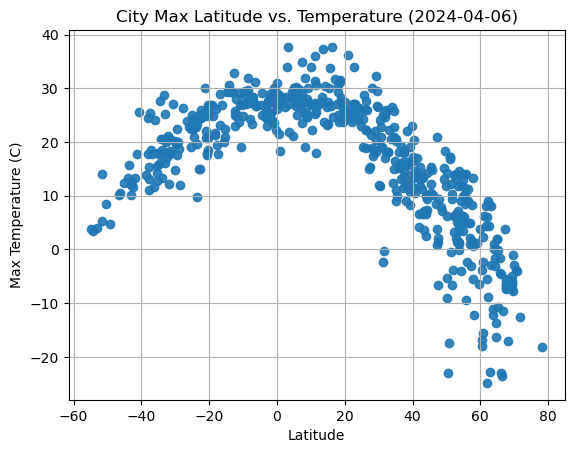

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],alpha=0.9)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Max Latitude vs. Temperature (2024-04-06)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

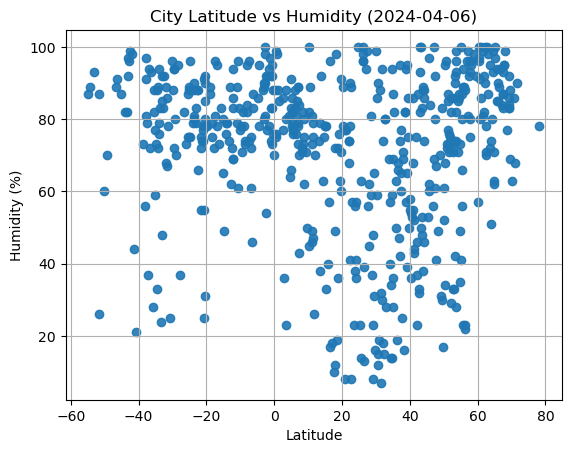

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],alpha=0.9)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs Humidity (2024-04-06)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

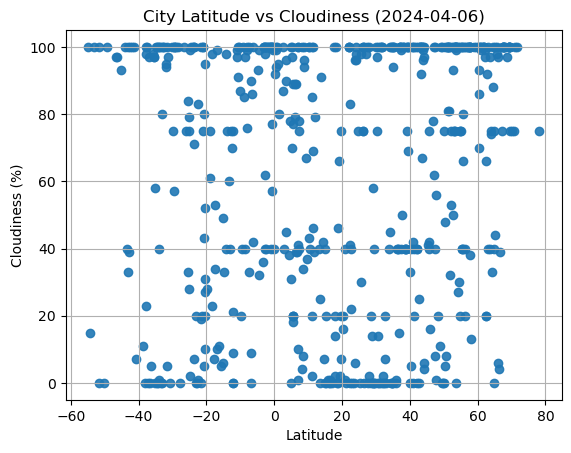

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],alpha=0.9)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs Cloudiness (2024-04-06)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

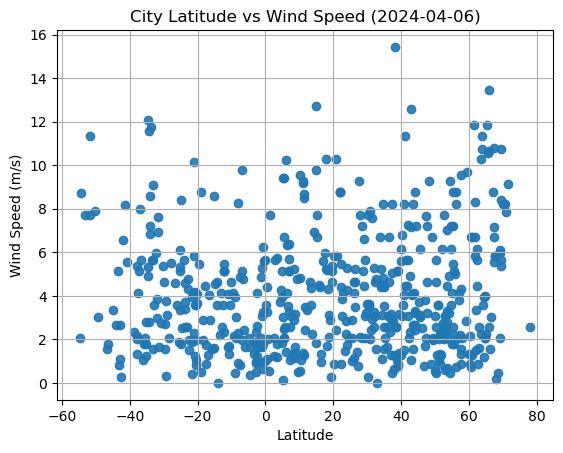

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],alpha=0.9)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs Wind Speed (2024-04-06)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
import scipy.stats as st
import matplotlib.pyplot as plt
x_values=[]
y_values=[]

def linear_regression(x_values,y_values):
    correlation=st.pearsonr(x_values,y_values)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    annotation_x=x_values.min()+0.1*(x_values.max()-x_values.min())
    annotation_y=y_values.min()+0.2*(y_values.max()-y_values.min())
    plt.annotate(line_eq,(annotation_x,annotation_y),fontsize=15,color="red")
    plt.show()
    print(f"The r-value is: {rvalue}")

def linear_regression_2(x_values,y_values):
    correlation=st.pearsonr(x_values,y_values)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel('Humidity')
    annotation_x=x_values.min()+0.1*(x_values.max()-x_values.min())
    annotation_y=y_values.min()+0.2*(y_values.max()-y_values.min())
    plt.annotate(line_eq,(annotation_x,annotation_y),fontsize=15,color="red")
    plt.show()
    print(f"The r-value is: {rvalue}")

def linear_regression_3(x_values,y_values):
    correlation=st.pearsonr(x_values,y_values)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel('Cloudiness')
    annotation_x=x_values.min()+0.1*(x_values.max()-x_values.min())
    annotation_y=y_values.min()+0.2*(y_values.max()-y_values.min())
    plt.annotate(line_eq,(annotation_x,annotation_y),fontsize=15,color="red")
    plt.show()
    print(f"The r-value is: {rvalue}")

def linear_regression_4(x_values,y_values):
    correlation=st.pearsonr(x_values,y_values)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed')
    annotation_x=x_values.min()+0.1*(x_values.max()-x_values.min())
    annotation_y=y_values.min()+0.2*(y_values.max()-y_values.min())
    plt.annotate(line_eq,(annotation_x,annotation_y),fontsize=15,color="red")
    plt.show()
    print(f"The r-value is: {rvalue}")

In [14]:
# Calling the data from the previous part of the exercise
import pandas as pd
city_data_df=pd.read_csv("output_data/cities.csv")
city_data_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,kharkhorin,47.1975,102.8238,3.85,69,62,1.70,MN,1712525159
1,1,hawaiian paradise park,19.5933,-154.9731,23.82,91,75,5.14,US,1712525007
2,2,port-aux-francais,-49.3500,70.2167,4.67,70,100,3.05,TF,1712524903
3,3,mae hong son,19.3003,97.9685,24.16,63,2,0.27,TH,1712525163
4,4,waitangi,-43.9535,-176.5597,13.23,82,100,2.68,NZ,1712524994
...,...,...,...,...,...,...,...,...,...,...
540,540,jeronimo monteiro,-20.7894,-41.3950,21.96,91,5,1.25,BR,1712525216
541,541,fuding,27.3273,120.2140,15.32,99,100,0.79,CN,1712525216
542,542,dara,15.3484,-15.4799,29.98,33,0,7.73,SN,1712525216
543,543,maxixe,-23.8597,35.3472,22.89,79,100,5.66,MZ,1712525120


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,kharkhorin,47.1975,102.8238,3.85,69,62,1.70,MN,1712525159
1,1,hawaiian paradise park,19.5933,-154.9731,23.82,91,75,5.14,US,1712525007
3,3,mae hong son,19.3003,97.9685,24.16,63,2,0.27,TH,1712525163
7,7,nemuro,43.3236,145.5750,3.57,100,100,4.02,JP,1712525164
8,8,vorkuta,67.5000,64.0000,-7.16,87,100,6.71,RU,1712524933


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<=0)]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,port-aux-francais,-49.3500,70.2167,4.67,70,100,3.05,TF,1712524903
4,4,waitangi,-43.9535,-176.5597,13.23,82,100,2.68,NZ,1712524994
5,5,alofi,-19.0595,-169.9187,26.94,89,75,8.75,NU,1712525163
6,6,grytviken,-54.2811,-36.5092,3.43,89,15,8.72,GS,1712524932
15,15,presidente olegario,-18.4178,-46.4181,21.66,75,23,1.99,BR,1712525164


###  Temperature vs. Latitude Linear Regression Plot

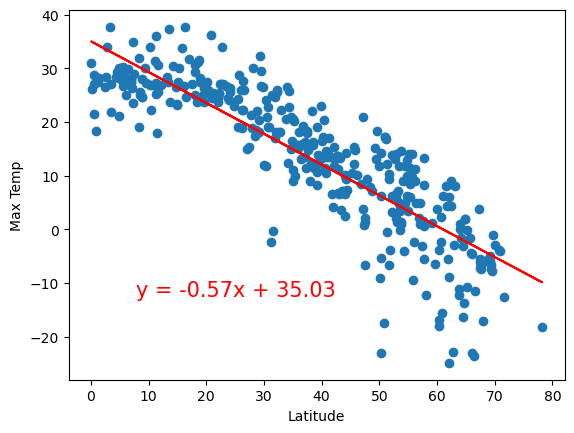

The r-value is: -0.8645909181622125


In [20]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
linear_regression(x_values,y_values)



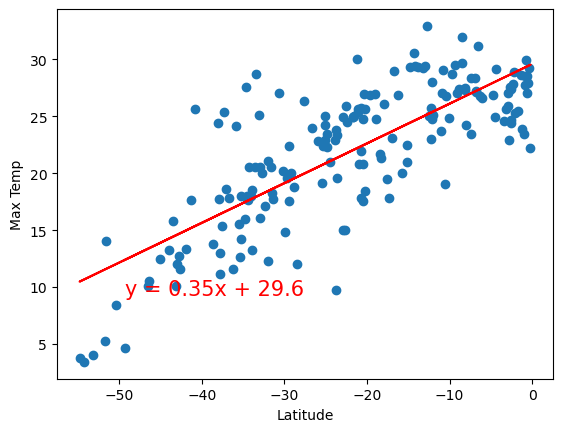

The r-value is: 0.782434793928649


In [21]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
linear_regression(x_values,y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

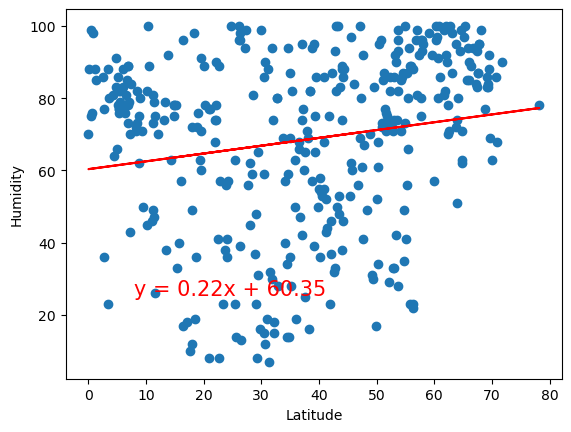

The r-value is: 0.1784729399983064


In [22]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
linear_regression_2(x_values,y_values)

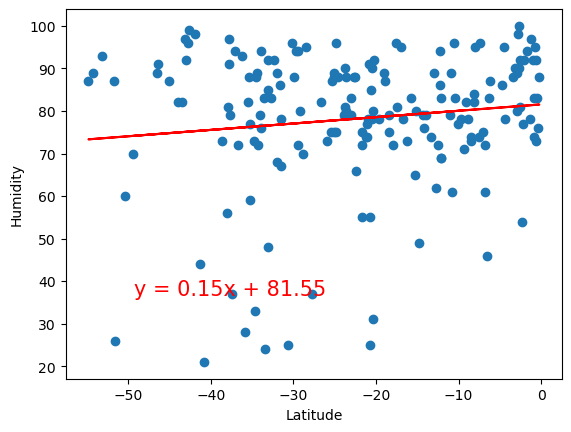

The r-value is: 0.12817599211269426


In [23]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
linear_regression_2(x_values,y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

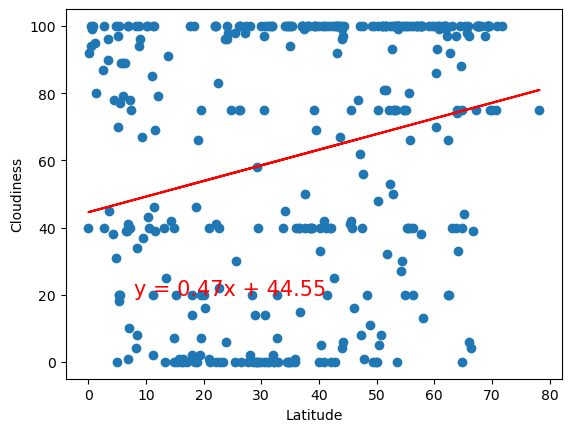

The r-value is: 0.2405619253905154


In [24]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
linear_regression_3(x_values,y_values)

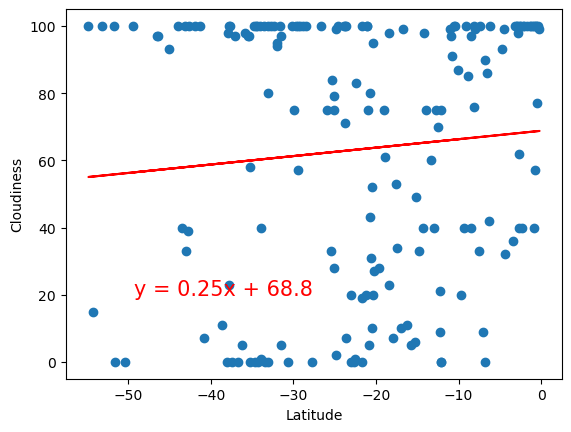

The r-value is: 0.09028842080009201


In [25]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
linear_regression_3(x_values,y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

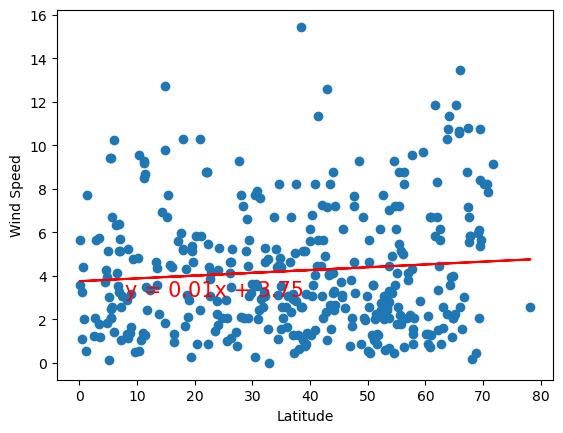

The r-value is: 0.08999610201128287


In [26]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
linear_regression_4(x_values,y_values)

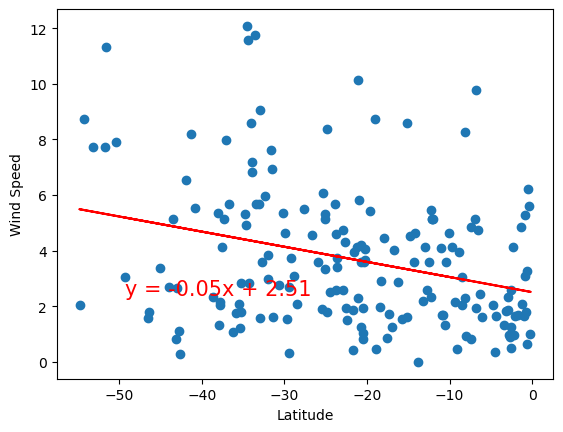

The r-value is: -0.3012769371031766


In [27]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
linear_regression_4(x_values,y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#In the Northern Hemisphere graphs we see a negative relationship between latitude and max temperature. As well, we can observe a positive relationship
#between latitud and Humidity, Cloudiness and Wind Speed. These relationships make absolute sense since as we approach the North Pole
# the temperature decreases and the rest of the factors see an increase.
#In the Soutern Hemisphere graphs we see different types of relationships. As we approach the equator (more latitud) the temperature increases
# but also the humidity and cloudiness. On the other hand, the wind speed has a negative relationship with the latitud and it decreases
# as we move closer to the equator.